In [1]:
# Makes the display take up more of the screen
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import plotly.express as px
from IPython.display import display
from ipywidgets import HTML, VBox, HBox
from plotly import graph_objects as go
import os
from pathlib import Path
import pandas as pd
import numpy as np
import PIL

In [3]:
from IPython.display import clear_output

In [4]:
from plotly import __version__ as plotlyVersion
plotlyVersion

'5.8.0'

In [5]:
x = np.random.rand(100)
y = np.random.rand(100)
df = pd.DataFrame(x, columns=['nb_x'])
df['nb_y']=y

In [6]:
path=Path(r'oxford-iiit-pet\images')

In [7]:
df['img_path']=[(o.name).split('.')[0] for o in os.scandir(path)][:100]

In [8]:
df.head()

,nb_x,nb_y,img_path
0,0.957200,0.162656,Abyssinian_1
1,0.542926,0.156413,Abyssinian_10
2,0.580998,0.848366,Abyssinian_100
3,0.722981,0.883608,Abyssinian_100
4,0.763823,0.489894,Abyssinian_101


In [9]:
ind=0
template=f"{path}"
template+="\\{}.jpg"
template

Abyssinian_1


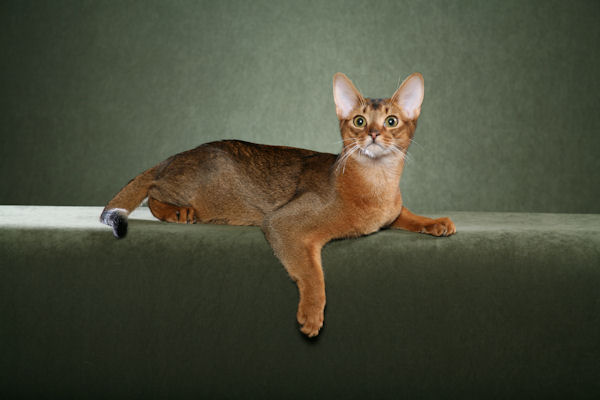

In [10]:
ind=0
print(df.loc[ind, 'img_path'])
img=PIL.Image.open(template.format(df.loc[ind, 'img_path']))
img.save('img.png')
img

In [11]:
def interactive_plot(df, fig, template, event="click") :
    """
    Make a plot react on hover or click of a data point and update a HTML preview below it.
    **template** Should be a string and contain placeholders like {colname} to be replaced by the value
    of the corresponding data row.
    
    """
    html = HTML("")

    def update(trace, points, state):
        img_lst=[o.name for o in os.scandir('.') if o.name.endswith('png') &o.name.startswith('img')]
        if len(img_lst) !=0: 
            for im in img_lst: os.remove(im)
        
        ind = points.point_inds[0]
        img_path = path/(df.loc[ind, 'img_path']+'.jpg')
        img=PIL.Image.open(img_path)
        img.save(f'img{ind}.png')
        html.value = f"<img src= 'img{ind}.png'>"
        
        

    fig = go.FigureWidget(data=fig.data, layout=fig.layout)

    if event == "click" :
        clear_output
        fig.data[0].on_click(update)
    return HBox([fig, html])

In [12]:
fig = px.scatter(df, "nb_x", "nb_y")
vb=interactive_plot(df, fig, template)
vb

    'data': [{'hovertemplate': 'nb_x=%{x}<br>nb_y=%{y}<extra></extra>',
        …

In [13]:
import datetime as dt
end=dt.datetime.now()
print(f'Finished: {end.strftime("%A %B %d, %Y")} at {end.strftime("%H:%M")}')

Finished: Friday May 12, 2023 at 08:05
